In [1]:
# Import
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Acquire Data
# The training features contain blank space, trim when loading in
train_features = pd.read_csv('data/trainFeatures.csv', header=0, skipinitialspace=True)
train_labels = pd.read_csv('data/trainLabels.csv', names=['over50'], header=None)
test_features = pd.read_csv('data/testFeatures.csv', header=0)

train_df = train_features.join(train_labels)

In [3]:
# distribution of numerical feature
print(train_features.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  34189.000000  3.418900e+04   34189.000000  34189.000000  34189.000000   
mean      38.646143  1.897921e+05      10.077101   1073.523765     87.645442   
std       13.679417  1.054070e+05       2.565457   7451.485819    403.366678   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178470e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784490e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376240e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    34189.000000  
mean        40.452836  
std         12.482635  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# Data Analysis on Numeric Fields

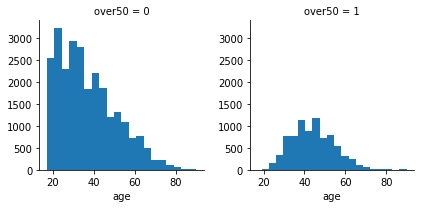

In [4]:
g = sns.FacetGrid(train_df, col='over50')
g.map(plt.hist, 'age', bins=20)

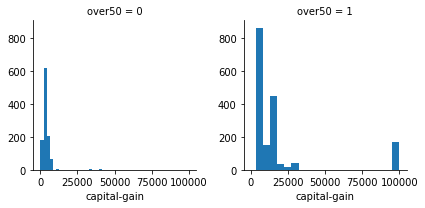

In [5]:
g = sns.FacetGrid(train_df[train_df['capital-gain'] > 0], col='over50')
g.map(plt.hist, 'capital-gain', bins=20)

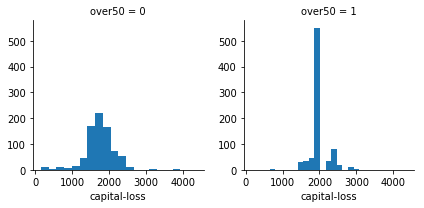

In [6]:
g = sns.FacetGrid(train_df[train_df['capital-loss'] > 0], col='over50')
g.map(plt.hist, 'capital-loss', bins=20)

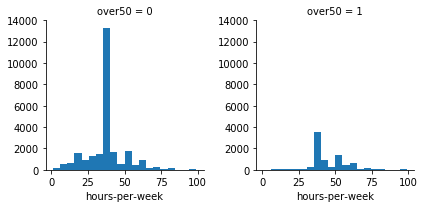

In [7]:
g = sns.FacetGrid(train_df[train_df['hours-per-week'] > 0], col='over50')
g.map(plt.hist, 'hours-per-week', bins=20)

Conclutions:
   
    1. Age
    For over 50K, we can see a kind of normal distribution on the age.  It makes sense as the earning power should be the highest for those people in the mid to senior level of their career.  The earning power tends to drop after retirement.
    For below 50K, the graph reflects that most of younger people does not earn high income while only a few outstanding young man is able to earn over 50K.
    
    2. Capital Gain and Loss
    As majority of people do not invest, it is necessary to remove 0 before we can have meaningful graph.  Obviously, people who invest (may be due to higher education background) tends to have higher income.
    
    3. Working hours
    No clear relationship can be found
    
    4. education-num
    It is more a category field presented in numeric form.
    

# Data Analysis on Categorial Fields

In [8]:
# distribution of categorial feature
print(train_features.describe(include=['O']))

       workclass education      Marital-status      occupation relationship  \
count      34189     34189               34189           34189        34189   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       23702     11079               15708            4323        13811   

         race    sex native-country  
count   34189  34189          34189  
unique      5      2             42  
top     White   Male  United-States  
freq    29199  22874          30722  


In [9]:
print(train_df.groupby(['workclass']).agg({'workclass':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['Marital-status']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['occupation']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['relationship']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['race']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['sex']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )
print(train_df.groupby(['native-country']).agg({'Marital-status':'count','over50':'mean'}).sort_values(['over50'], ascending=False) )


                  workclass    over50
workclass                            
Self-emp-inc           1192  0.550336
Federal-gov             995  0.389950
Local-gov              2218  0.297565
Self-emp-not-inc       2713  0.270181
State-gov              1393  0.262742
Private               23702  0.218336
?                      1950  0.096923
Without-pay              16  0.062500
Never-worked             10  0.000000
                       Marital-status    over50
Marital-status                                 
Married-civ-spouse              15708  0.445569
Married-AF-spouse                  29  0.344828
Divorced                         4562  0.099737
Married-spouse-absent             432  0.090278
Widowed                          1096  0.084854
Separated                        1065  0.062911
Never-married                   11297  0.044702
                   Marital-status    over50
occupation                                 
Exec-managerial              4285  0.476313
Prof-specialty    

Conclutions:
   
    1. Workclass
    Majority of the people are grouped under Private.  Note that there are few samples with missing data marked '?'. 
    
    2. Occupation
    There is a clear correlation between occupation and the income.  The occupation requires higher education background tends to earn higher income.
    
    3. Missing Data
    '?' can be found in workclass, occupation and native-country
    

# Correlation Analysis on All Fields

In [10]:
# Encode all the categorial fields to number fields first
train_features[['workclass']]=train_features[['workclass']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['Marital-status']]=train_features[['Marital-status']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['occupation']]=train_features[['occupation']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['relationship']]=train_features[['relationship']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['race']]=train_features[['race']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['sex']]=train_features[['sex']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['native-country']]=train_features[['native-country']].apply(preprocessing.LabelEncoder().fit_transform)
train_features[['education']]=train_features[['education']].apply(preprocessing.LabelEncoder().fit_transform)

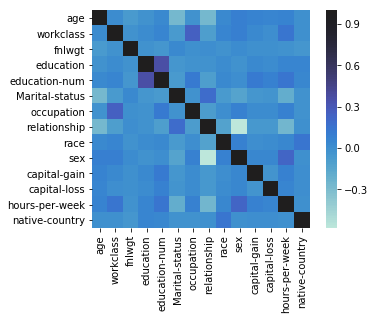

In [11]:
# Plot correlation using heatmap
sns.heatmap(train_features.corr(), square=True, center=1)
plt.show()

Decision:
    1. We can see that education and education-num are highly correlated.  After checking the data content, we know that education-num is just numeric representation of education.  So it is safe to drop education. 

# Machine Learning (Baseline)

Without tunning the data, we first run the ensemble algorithms as baseline result.
We will run 3 types of ensemble algorithms:
1. RandomForestClassifier
2. AdaBoostClassifier
3. GradientBoostingClassifier

In [12]:
# Setup K-Fold
num_folds = 5

kf = KFold(n_splits=num_folds, random_state=None, shuffle=True)

In [13]:
# RandomForestClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features.iloc[tr], train_features.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = RandomForestClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("RandomForestClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.988629, Test Accuracy: 0.850980
1 Fold:: Training Accuracy: 0.988812, Test Accuracy: 0.846885
2 Fold:: Training Accuracy: 0.987862, Test Accuracy: 0.846446
3 Fold:: Training Accuracy: 0.987752, Test Accuracy: 0.856245
4 Fold:: Training Accuracy: 0.990202, Test Accuracy: 0.847301
RandomForestClassifier:
Average Training Accuracy : 0.988651
Average Test Accuracy : 0.849571


In [14]:
# AdaBoostClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features.iloc[tr], train_features.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("AdaBoostClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.859310, Test Accuracy: 0.862094
1 Fold:: Training Accuracy: 0.859164, Test Accuracy: 0.863410
2 Fold:: Training Accuracy: 0.862564, Test Accuracy: 0.855806
3 Fold:: Training Accuracy: 0.860956, Test Accuracy: 0.858438
4 Fold:: Training Accuracy: 0.861473, Test Accuracy: 0.857540
AdaBoostClassifier:
Average Training Accuracy : 0.860693
Average Test Accuracy : 0.859458


In [15]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features.iloc[tr], train_features.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.860590, Test Accuracy: 0.863849
1 Fold:: Training Accuracy: 0.860188, Test Accuracy: 0.860339
2 Fold:: Training Accuracy: 0.860224, Test Accuracy: 0.862387
3 Fold:: Training Accuracy: 0.862967, Test Accuracy: 0.855221
4 Fold:: Training Accuracy: 0.862240, Test Accuracy: 0.861489
GradientBoostingClassifier:
Average Training Accuracy : 0.861242
Average Test Accuracy : 0.860657


Conclustion:
    1. RandomForest has high training accuracy.  It is due to the nature of radom forest.  It tends to overfit training data set.
    2. AdaBoost and GradientBoost has relatively better result than RandomForest.  GradientBoost is chosen in this assignment.
    

# Data Preprocessing

## 1. Drop Duplicated Feature - Education

In [16]:
train_features_transform1 = train_features.copy()
train_features_transform1=train_features_transform1.drop('education', axis=1)

print(train_features_transform1)

       age  workclass  fnlwgt  education-num  Marital-status  occupation  \
0       24          4  258298             11               4          13   
1       28          4  208249             10               0          13   
2       49          4  143459              5               5           6   
3       24          4  228772              3               4           7   
4       20          7   41103             10               4           8   
5       24          4   89154              5               4           8   
6       57          4  157749             10               2           3   
7       30          4  202046              9               4           1   
8       40          4  163434             10               2           6   
9       20          4  180339              9               4           8   
10      53          0  237868              9               2           0   
11      51          4  120173             11               2           3   
12      22  

In [17]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features_transform1):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features_transform1.iloc[tr], train_features_transform1.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.860809, Test Accuracy: 0.861070
1 Fold:: Training Accuracy: 0.860224, Test Accuracy: 0.863849
2 Fold:: Training Accuracy: 0.862638, Test Accuracy: 0.857414
3 Fold:: Training Accuracy: 0.861468, Test Accuracy: 0.858731
4 Fold:: Training Accuracy: 0.861326, Test Accuracy: 0.859002
GradientBoostingClassifier:
Average Training Accuracy : 0.861293
Average Test Accuracy : 0.860013


## 2. Categorize Working Hour

In [18]:
# Categorize working hour, based on the quantile information
# 0 : <40
# 1 : 40-45
# 2 : 46-60
# 3 : 60-80
# 4 : >80

train_features_transform2 = train_features.copy()
bins = [0, 40, 45, 60, 80, np.inf]
names = ['0', '1', '2', '3', '4']

train_features_transform2['hours-per-week'] = pd.cut(train_features_transform1['hours-per-week'], bins, labels=False)

In [19]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features_transform2):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features_transform2.iloc[tr], train_features_transform2.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.859201, Test Accuracy: 0.863118
1 Fold:: Training Accuracy: 0.860334, Test Accuracy: 0.855513
2 Fold:: Training Accuracy: 0.860151, Test Accuracy: 0.858292
3 Fold:: Training Accuracy: 0.860590, Test Accuracy: 0.859316
4 Fold:: Training Accuracy: 0.859389, Test Accuracy: 0.858417
GradientBoostingClassifier:
Average Training Accuracy : 0.859933
Average Test Accuracy : 0.858931


## 3. Categorize Capital - High/Medium/Low

In [20]:
# Find 0, 25, 75, 100% quantile for capital-gain
print(np.percentile(train_features_transform2[train_features_transform2['capital-gain']>0]['capital-gain'], [0,25, 75,100]))
# Find 0, 25, 75, 100% quantile for capital-loss
print(np.percentile(train_features_transform2[train_features_transform2['capital-loss']>0]['capital-loss'], [0,25, 75,100]))

[   114.   3411.  13550.  99999.]
[  155.  1672.  1977.  4356.]


In [21]:
train_features_transform3 = train_features.copy()

bins2=[  -1,  3411, 13550, 99999]
train_features_transform3['capital-gain'] = pd.cut(train_features_transform2['capital-gain'], bins2, labels=False)
bins3=[ -1, 1672, 1977, 4356]
train_features_transform3['capital-loss'] = pd.cut(train_features_transform2['capital-loss'], bins3, labels=False)

In [22]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features_transform3):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features_transform3.iloc[tr], train_features_transform3.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.853863, Test Accuracy: 0.852442
1 Fold:: Training Accuracy: 0.854448, Test Accuracy: 0.851857
2 Fold:: Training Accuracy: 0.851852, Test Accuracy: 0.853466
3 Fold:: Training Accuracy: 0.851852, Test Accuracy: 0.855075
4 Fold:: Training Accuracy: 0.854599, Test Accuracy: 0.849349
GradientBoostingClassifier:
Average Training Accuracy : 0.853323
Average Test Accuracy : 0.852438


## 4. Split and Scale

In [23]:
train_features_transform4 = train_features.copy()
scaler = preprocessing.StandardScaler()

train_features_transform4[['age']] = scaler.fit_transform(train_features_transform4[['age']])
train_features_transform4[['fnlwgt']] = scaler.fit_transform(train_features_transform4[['fnlwgt']])
train_features_transform4[['capital-gain']] = scaler.fit_transform(train_features_transform4[['capital-gain']])
train_features_transform4[['capital-loss']] = scaler.fit_transform(train_features_transform4[['capital-loss']])
train_features_transform4[['hours-per-week']] = scaler.fit_transform(train_features_transform4[['hours-per-week']])

In [24]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features_transform4):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features_transform4.iloc[tr], train_features_transform4.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.860151, Test Accuracy: 0.860486
1 Fold:: Training Accuracy: 0.862272, Test Accuracy: 0.856391
2 Fold:: Training Accuracy: 0.859822, Test Accuracy: 0.860193
3 Fold:: Training Accuracy: 0.860919, Test Accuracy: 0.860193
4 Fold:: Training Accuracy: 0.858621, Test Accuracy: 0.863975
GradientBoostingClassifier:
Average Training Accuracy : 0.860357
Average Test Accuracy : 0.860248


## Conclusion

Categorizing working hour and capital gain/loss worsen the accuracy.  Therefore these two data pre-processing should not be taken.
In the final decision, I am going to drop the duplicated feature Education and scale the numeric values.

In [25]:
train_features_final = train_features.copy()
train_features_final=train_features_final.drop('education', axis=1)

scaler = preprocessing.StandardScaler()

train_features_final[['age']] = scaler.fit_transform(train_features_final[['age']])
train_features_final[['fnlwgt']] = scaler.fit_transform(train_features_final[['fnlwgt']])
train_features_final[['capital-gain']] = scaler.fit_transform(train_features_final[['capital-gain']])
train_features_final[['capital-loss']] = scaler.fit_transform(train_features_final[['capital-loss']])
train_features_final[['hours-per-week']] = scaler.fit_transform(train_features_final[['hours-per-week']])

In [28]:
# GradientBoostingClassifier
cv = 0
accum_test_accuracy = 0
accum_train_accuracy = 0

for tr, tst in kf.split(train_features_final):
    #print("TRAIN:", tr, "TEST:", tst)
    #Train Test Split
    training_x, test_x = train_features_final.iloc[tr], train_features_final.iloc[tst]
    training_y, test_y = train_labels.iloc[tr], train_labels.iloc[tst]

    rf = AdaBoostClassifier()
    rf.fit(training_x,training_y.values.ravel())

    # Measuring training and test accuracy
    tr_accuracy = rf.score(training_x,training_y)
    test_accuracy = rf.score(test_x, test_y)

    print ("%d Fold:: Training Accuracy: %3f, Test Accuracy: %3f" % (
        cv, tr_accuracy, test_accuracy))
    accum_test_accuracy += test_accuracy
    accum_train_accuracy += tr_accuracy
    cv += 1

print ("GradientBoostingClassifier:")
print ("Average Training Accuracy : %3f" % (accum_train_accuracy/num_folds))
print ("Average Test Accuracy : %3f" % (accum_test_accuracy/num_folds))
print (70 * '=')

0 Fold:: Training Accuracy: 0.862053, Test Accuracy: 0.861509
1 Fold:: Training Accuracy: 0.859566, Test Accuracy: 0.860047
2 Fold:: Training Accuracy: 0.860042, Test Accuracy: 0.864142
3 Fold:: Training Accuracy: 0.861065, Test Accuracy: 0.857561
4 Fold:: Training Accuracy: 0.860083, Test Accuracy: 0.862220
GradientBoostingClassifier:
Average Training Accuracy : 0.860562
Average Test Accuracy : 0.861096


# Predict

In [29]:
test_features[['workclass']]=test_features[['workclass']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['Marital-status']]=test_features[['Marital-status']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['occupation']]=test_features[['occupation']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['relationship']]=test_features[['relationship']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['race']]=test_features[['race']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['sex']]=test_features[['sex']].apply(preprocessing.LabelEncoder().fit_transform)
test_features[['native-country']]=test_features[['native-country']].apply(preprocessing.LabelEncoder().fit_transform)
test_features=test_features.drop('education', axis=1)

scaler = preprocessing.StandardScaler()

test_features[['age']] = scaler.fit_transform(test_features[['age']])
test_features[['fnlwgt']] = scaler.fit_transform(test_features[['fnlwgt']])
test_features[['capital-gain']] = scaler.fit_transform(test_features[['capital-gain']])
test_features[['capital-loss']] = scaler.fit_transform(test_features[['capital-loss']])
test_features[['hours-per-week']] = scaler.fit_transform(test_features[['hours-per-week']])

In [61]:
predict_labels = rf.predict(test_features)
np.savetxt('data/sampleSubmission.csv', predict_labels, delimiter='\n',fmt='%d')